In [2]:
import pennylane as pl
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Uniform superpositions

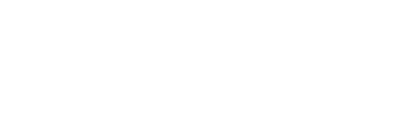

In [3]:
n_bits = 4
dev = pl.device("default.qubit", wires=n_bits)

@pl.qnode(dev)
def uniformsuperposition():
    """Build a circuit that creates an n-qubit uniform superposition"""
    return pl

pl.drawer.use_style("black_white")
pl.draw_mpl(uniformsuperposition)();


# Exercise 2: Oracles

In [4]:
def oracle_matrix(key):
    """Create the unitary matrix corresponding to the binary key (list[int])
       e.g. key=[0,1,1] should give the diagonal matrix [1,1,1,-1,1,1,1,1]"""
    # Hint: use np.ravel_multi_index
    matrix = np.identity(2**len(key))
    return matrix

print(oracle_matrix([0,1,1,0]))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


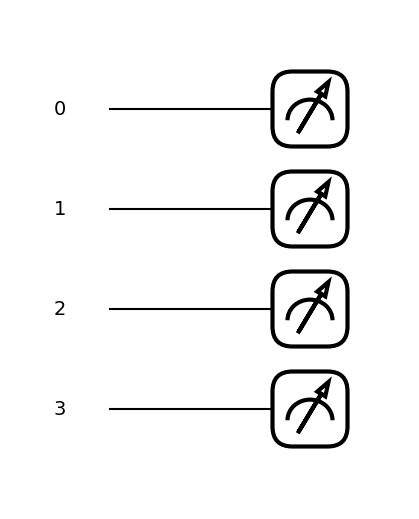

In [5]:
@pl.qnode(dev)
def oracle_circuit(key):
    # Hint: use pl.QubitUnitary
    return pl.probs(wires=range(n_bits))

pl.draw_mpl(oracle_circuit)([0,1,1,0]);
print(oracle_circuit([0,1,1,0]))


# Exercise 3: Pair programming

[1. 0.]


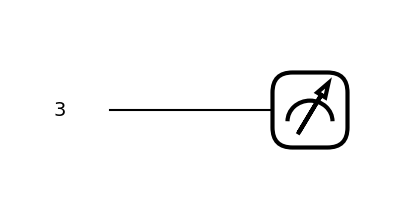

In [8]:
n_bits = 4 
dev = pl.device("default.qubit", wires=n_bits)
@pl.qnode(dev)
def pair_circuit(probe, key):
    """Test whether probe (list[int]) contains a solution to key (list[int])"""
    return pl.probs(wires=n_bits-1)

pl.drawer.use_style("black_white")
pl.draw_mpl(pair_circuit)([1,0,0,1],[0,1,1,1]);
print(pair_circuit([0,1,1,1],[0,1,1,1]))


In [9]:
secretkey = [0,1,0,1] 
       
def pair_lock_picker(trials):
    keystrings = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    keys = [[int(s) for s in keystring] for keystring in keystrings] 

    testnumbers = []

    for trial in range(trials):
        counter = 0
        for key in keys:
            counter += 1
            if np.isclose(pair_circuit(key, secretkey)[1], 1):
                break
        testnumbers.append(counter)
    return sum(testnumbers)/trials

trials = 500
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")

For 4 bits, it takes 8.0 pair tests on average.


# Exercise 4: Deutsch-Jozsa

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
constant


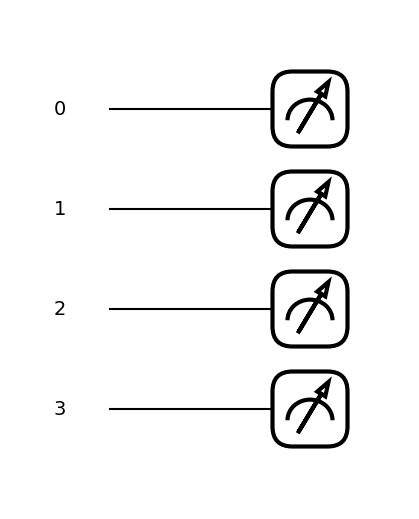

In [10]:
n_bits = 4
dev = pl.device("default.qubit", wires=n_bits)

def oracle_matrix(keys):
    """Create the unitary matrix corresponding to the binary key (list[int])
       e.g. key=[0,1,1] should give the diagonal matrix [1,1,1,-1,1,1,1,1]"""
    # Hint: use np.ravel_multi_index    
    matrix = np.identity(2 ** n_bits)
    return matrix

@pl.qnode(dev)
def deutschjozsa(keys):
    """Build the Deutsch-Jozsa circuit"""
    return pl.probs(wires=range(n_bits))

keys = ([[0,0,0,0],[0,0,0,1],[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,1,1],[0,1,1,0]])
pl.draw_mpl(deutschjozsa)(keys)
print(deutschjozsa(keys))
if np.isclose(deutschjozsa(keys)[0],0):
    print("balanced")
else:
    print("constant")

# Exercise 5: Bernstein-Vazirani

The value of a is [0 0 0]


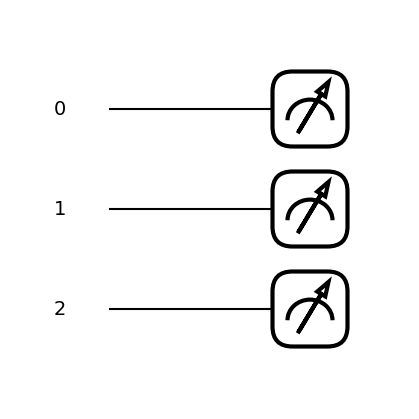

In [11]:
dev = pl.device("default.qubit", wires = 4, shots = 1)

def oracle():
    """Encode the hidden value in a circuit"""
    pl.CNOT(wires=[1, 3])
    pl.CNOT(wires=[2 ,3])
    
@pl.qnode(dev)
def bernsteinvazirani():
    """Sample the Bernstein-Vazirani circuit to return the hidden value"""
    return pl.sample(wires = range(3))

pl.drawer.use_style("black_white")
pl.draw_mpl(bernsteinvazirani)()
a = bernsteinvazirani()
print(f"The value of a is {a}")